## Singular Value Decomposition (SVD)

SVD is the work-horse of DMRG. Following is the statement of the theorem:
	
    
If $ A\in M_{m,n} $, has rank $r$, then it may be written in the form
	 	$$ A=USV^{\dagger}, $$
	 	where $ U\in M_{m,\text{min}(m,n)} $ has orthonormal columns and $ V^{\dagger}\in M_{\text{min}(m,n),n} $ has orthonormal rows. The matrix $ S=\left[\sigma_{ij}\right]\in M_{\text{min}(m,n),\text{min}(m,n)} $ has $ \sigma_{11}\geq\sigma_{22}\dots\geq\sigma_{rr} $. The numbers \{$ \sigma_{ii}=\sigma_i $\} are the nonnegative square roots of the eigenvalues of $ AA^{\dagger} $, and hence are uniquely determined. The columns of $ U $ are eigenvectors of $ AA^{\dagger} $ and the rows of $ V^{\dagger} $ are eigenvectors of $ A^{\dagger}A $. 

SVD can be used to minimize $ \parallel D - \hat{D} \parallel_F $ over $ \hat{D} $, subject to $ \text{rank}(\hat{D})\leq k $. Here $ D $ (rank $ r $) and $ \hat{D} $ are in $ M_{m,n}  $. $ \parallel \parallel_F $ is the Frobenius norm. $ \hat{D} $ is said to be a rank $ k $ approximation of $ D $. Let's denote the SVD of $ D $ by $ D=USV^{\dagger} $. Now for any matrix $ A\in M_{m,n} $ define the matrix $ D'=U^{\dagger}AV $, so $ A=UD'V^{\dagger} $. Then
$$
\parallel D - A \parallel_F^2\ =\ \parallel \Sigma - D' \parallel_F^2 \ \geq\ \sum_{i>k}|\sigma_i-D'_{ii}|^2
$$
Thus the best rank $ k $ approximation of $ D $ is given by $ \hat{D}=UD'V^{\dagger} $, where $ D' = \text{Diag}\left(\sigma_1,\dots,\sigma_k\right) $.

In the following example, we use SVD to approximate an image (which is stored as a 2D matrix). This is a rudimentary image compression technique.

<IPython.core.display.Javascript object>


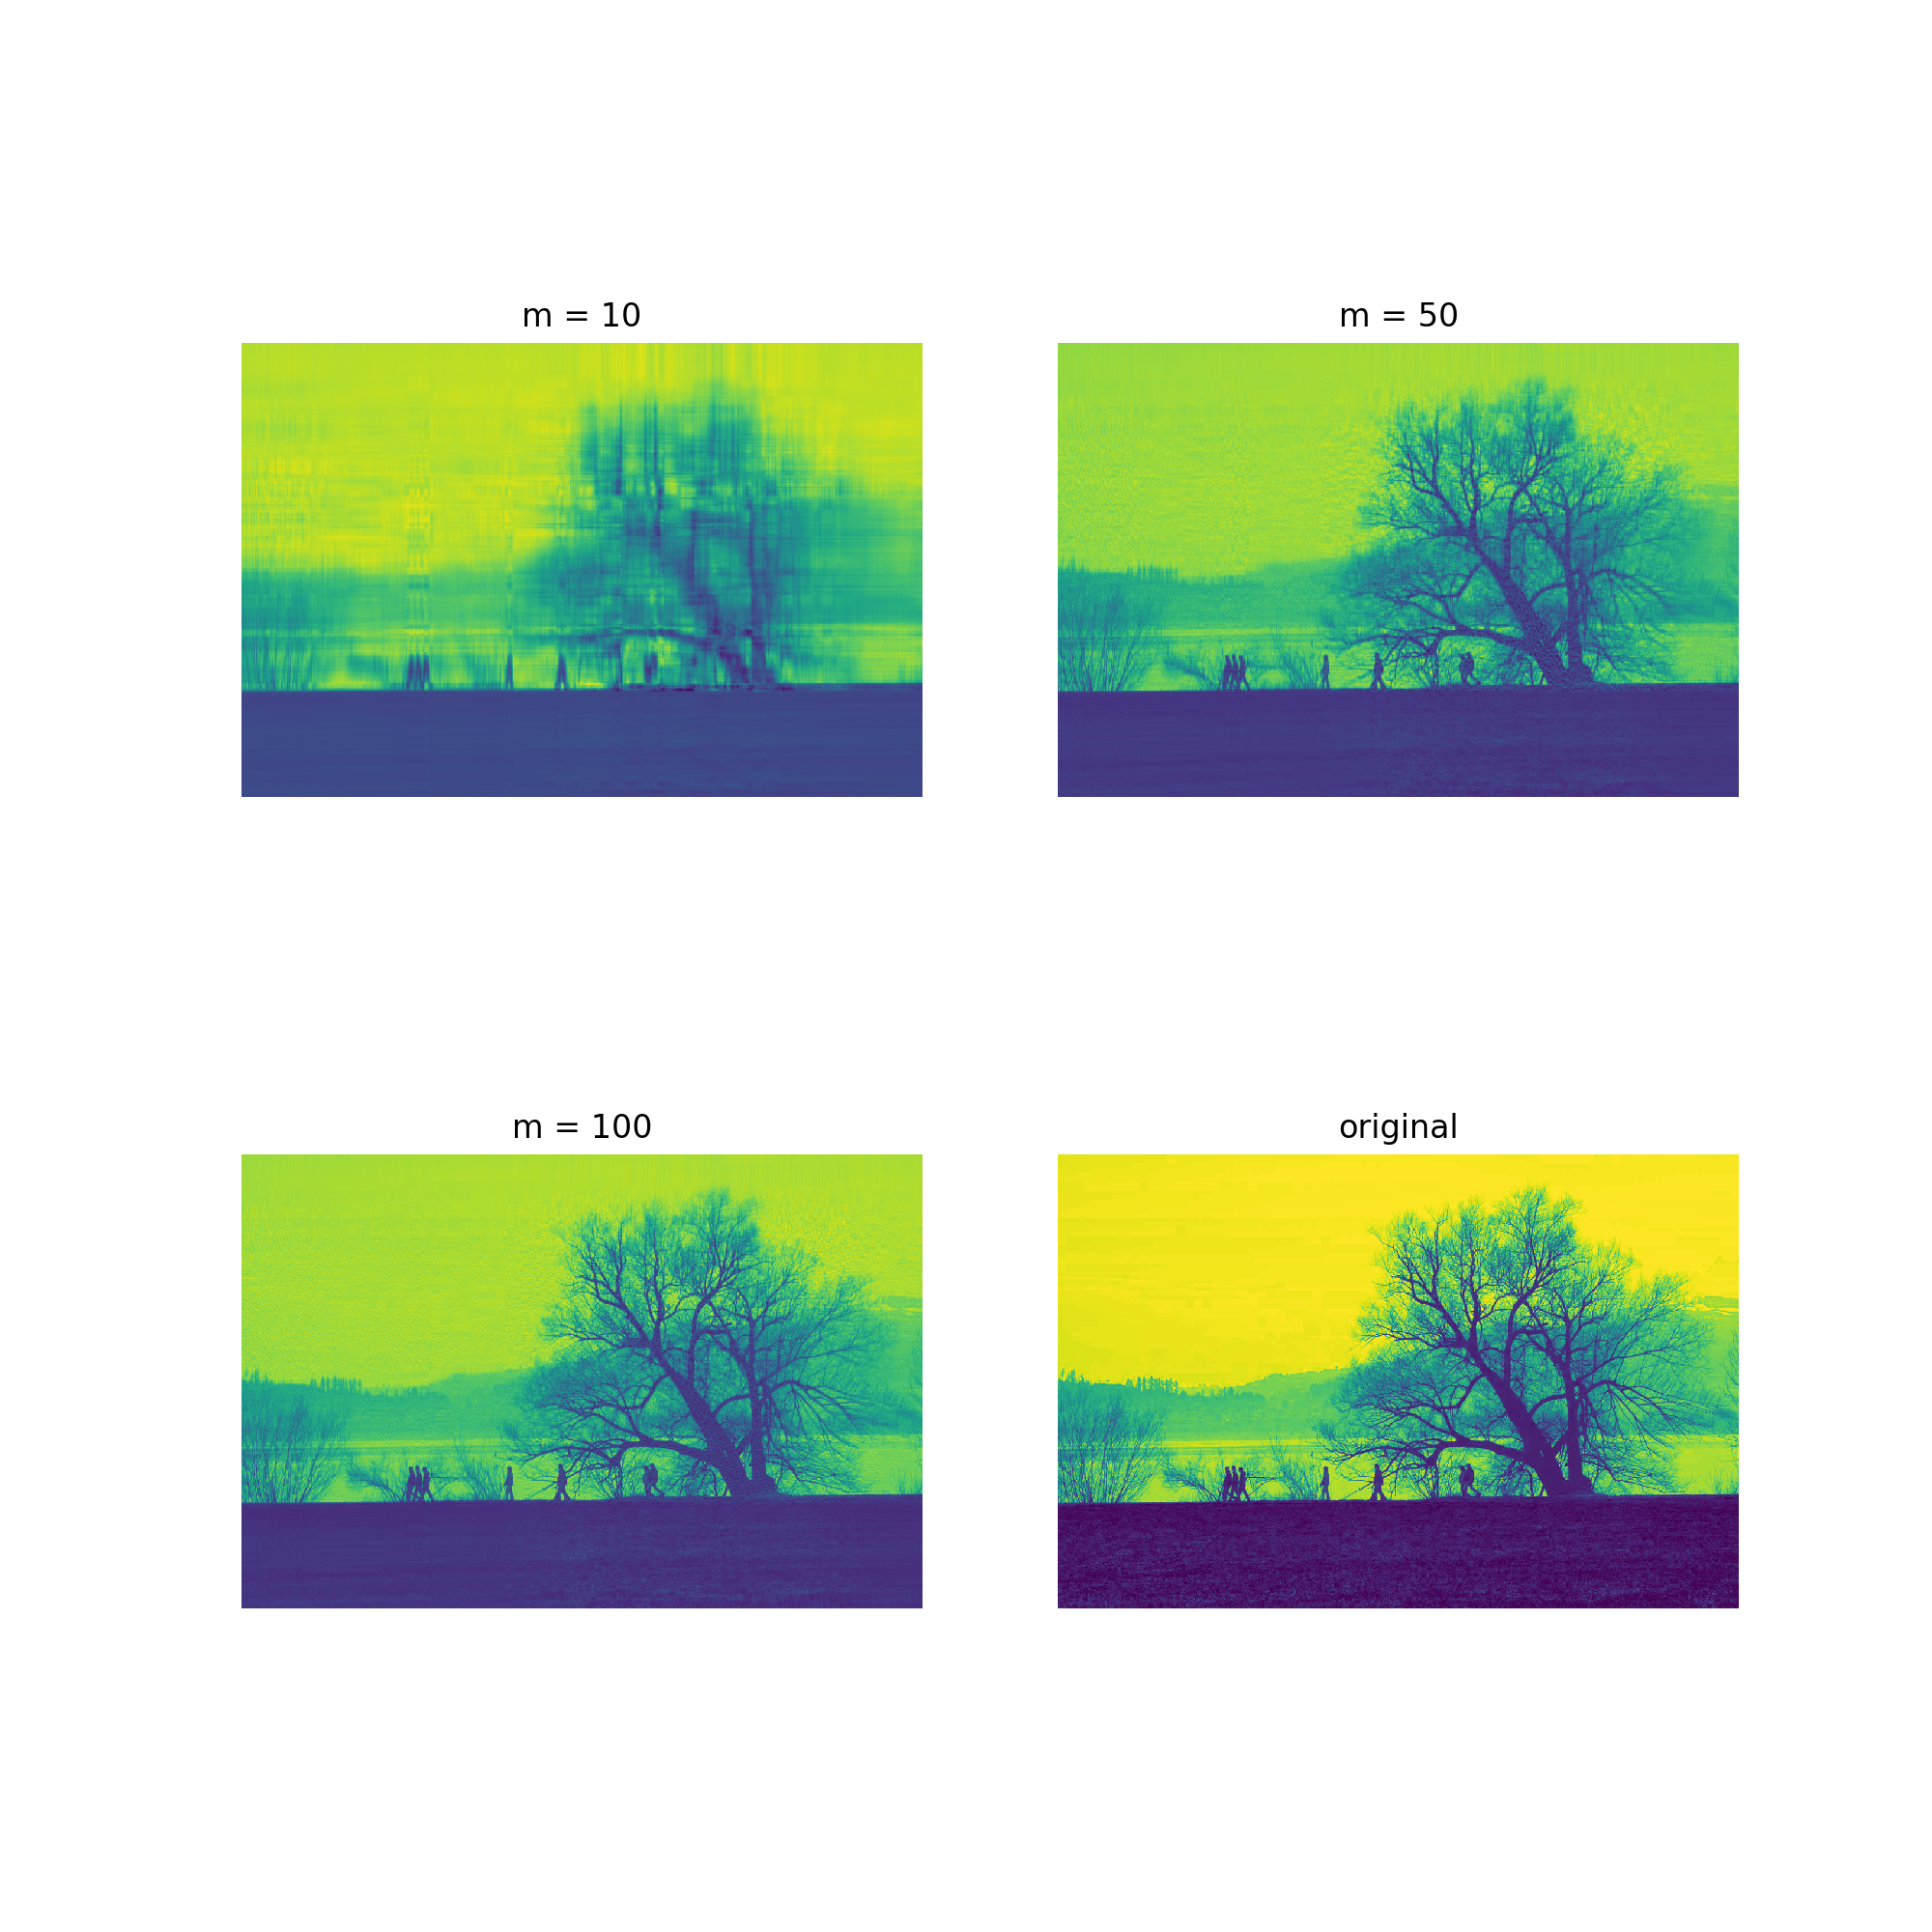

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
import urllib.request
%matplotlib notebook
req = urllib.request.urlopen('http://www.bigfoto.com/lake-tree.jpg') # insert your favorite image
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)[:,:,0] 
U, S, V = np.linalg.svd(img, full_matrices=0)
m=10
Sm = np.diag(S[0:m])
Um = U[:,0:m]
Vm = V[0:m,:]
img10 = ((Um@Sm)@Vm)
m=50
Sm = np.diag(S[0:m])
Um = U[:,0:m]
Vm = V[0:m,:]
img50 = ((Um@Sm)@Vm)
m=100
Sm = np.diag(S[0:m])
Um = U[:,0:m]
Vm = V[0:m,:]
img100 = ((Um@Sm)@Vm)
matplotlib.rcParams['figure.figsize'] = (10,10)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img10)
axarr[0,0].set_title("m = 10")
axarr[0,0].axis('off')
axarr[0,1].imshow(img50)
axarr[0,1].set_title("m = 50")
axarr[0,1].axis('off')
axarr[1,0].imshow(img100)
axarr[1,0].set_title("m = 100")
axarr[1,0].axis('off')
axarr[1,1].imshow(img)
axarr[1,1].set_title("original")
axarr[1,1].axis('off')
plt.show()

P.S. for the curious: On the surface quantum mechanics and image processing don't seem to have much in common. Turns out, they actually do: https://arxiv.org/abs/1710.05520  